In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
data_set = pd.read_csv("data.csv")
data_set.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
#Data cleaning
def clean(x):
    x=x.fillna(x.mean()).astype(np.int64)
    return x

data_set[['Agility','Acceleration','Balance','Positioning','Skill Moves','BallControl','Crossing','Finishing','Reactions','SprintSpeed']]= clean(data_set[['Agility','Acceleration','Balance','Positioning','Skill Moves','BallControl','Crossing','Finishing','Reactions','SprintSpeed']])

In [7]:
def corr(x):
    corr_x=stats.spearmanr(x,data_set['SprintSpeed'])
    return corr_x

print("The correlation between sprint speed and the Agility is ",corr(data_set['Agility']))

The correlation between sprint speed and the Agility is  SpearmanrResult(correlation=0.72943692749090694, pvalue=0.0)


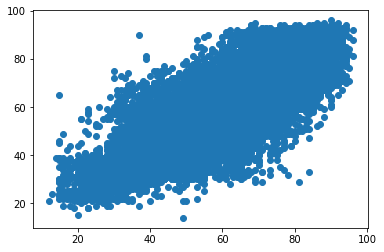

In [9]:
plt.scatter(data_set['SprintSpeed'],data_set['Agility'])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_set,test_size=0.2)

In [20]:
features=['Agility','Acceleration','Balance','Positioning','Skill Moves','BallControl','Crossing','Finishing','Reactions']
result = ['SprintSpeed']

In [21]:
model = LinearRegression()
model.fit(train[features],train[result])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
score_test = test[result]
predict_test = model.predict(test[features])
MAE = mean_absolute_error(score_test,predict_test)
r2_score_test = r2_score(score_test,predict_test)

In [27]:
score_train = train[result]
predict_train = model.predict(train[features])
MAE_train = mean_absolute_error(score_train,predict_train)
r2_score_train = r2_score(score_train,predict_train)

In [30]:
print("This model accounts for {}% training data with error marigin {} ".format((round(r2_score_train,2))*100,round(MAE_train,2)))
print("This model accounts for {}% testing data with error marigin {} ".format((round(r2_score_test,2))*100,round(MAE,2)))

This model accounts for 86.0% training data with error marigin 4.07 
This model accounts for 85.0% testing data with error marigin 4.22 


In [111]:
player=data_set.iloc[25]
#player.shape
type(player)
player

Unnamed: 0                                                              25
ID                                                                  231747
Name                                                             K. Mbappé
Age                                                                     19
Photo                       https://cdn.sofifa.org/players/4/19/231747.png
Nationality                                                         France
Flag                                   https://cdn.sofifa.org/flags/18.png
Overall                                                                 88
Potential                                                               95
Club                                                   Paris Saint-Germain
Club Logo                      https://cdn.sofifa.org/teams/2/light/73.png
Value                                                                 €81M
Wage                                                                 €100K
Special                  

In [62]:
player_stats=player[['Agility','Acceleration','Balance','Positioning','Skill Moves','BallControl','Crossing','Finishing','Reactions']]
model.predict([[player_stats[0],player_stats[1],player_stats[2],player_stats[3],player_stats[4],player_stats[5],player_stats[6],player_stats[7],player_stats[8]]])

array([[ 92.97102631]])

#### I have made the below code to predict by taking the Player name from the user

In [ ]:
name=input("Enter the Name of the player : ")
player1 = data_set.loc[data_set['Name']== name]
player1=data_set.iloc[player1.index[0]]
#player1

In [110]:
player_stats=player1[['Agility','Acceleration','Balance','Positioning','Skill Moves','BallControl','Crossing','Finishing','Reactions']]
predicted_score = model.predict([[player_stats[0],player_stats[1],player_stats[2],player_stats[3],player_stats[4],player_stats[5],player_stats[6],player_stats[7],player_stats[8]]])
print("The Sprint speed predicted for player {} is {} with mean absolute error of {}".format(name,predicted_score,MAE))

The Sprint speed predicted for player K. Mbappé is [[ 92.97102631]] with mean absolute error of 4.215878114767641
